# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [13]:
import pandas as pd

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds.head()

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


In [16]:
ds.shape

(15335, 37)

In [17]:
ds.columns

Index(['Unnamed: 0', 'id_realEstates', 'isNew', 'realEstate_name',
       'phone_realEstate', 'url_inmueble', 'rooms', 'bathrooms', 'surface',
       'price', 'date', 'description', 'address', 'country', 'level1',
       'level2', 'level3', 'level4', 'level5', 'level6', 'level7', 'level8',
       'upperLevel', 'countryId', 'level1Id', 'level2Id', 'level3Id',
       'level4Id', 'level5Id', 'level6Id', 'level7Id', 'level8Id', 'accuracy',
       'latitude', 'longitude', 'zipCode', 'customZone'],
      dtype='object')

In [19]:
ds.isnull().sum().sort_values(ascending=False)

zipCode             15335
customZone          15335
level6              14627
level8               8579
level4               6643
level7               2277
surface              1250
phone_realEstate      794
rooms                 353
bathrooms             345
description           142
realEstate_name        10
Unnamed: 0              0
id_realEstates          0
isNew                   0
address                 0
country                 0
level3                  0
date                    0
price                   0
url_inmueble            0
level5                  0
level1                  0
level2                  0
upperLevel              0
level2Id                0
level3Id                0
countryId               0
level1Id                0
level5Id                0
level4Id                0
level6Id                0
level7Id                0
accuracy                0
level8Id                0
longitude               0
latitude                0
dtype: int64

In [27]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

In [22]:
ds['id_realEstates'].nunique()

14217

In [23]:
ds['id_realEstates'].duplicated().sum()

np.int64(1118)

In [24]:
ds[ds['id_realEstates'].duplicated()]

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
155,156,153986774,False,grupo tizona,911227059.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,100.0,179900,...,0,0,0,0,0,0,"40,31495","-3,85764",NaN,NaN
785,786,153674618,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,128.0,540000,...,0,0,0,0,0,0,"40,4047485786438","-3,67681142135624",NaN,NaN
965,966,154001257,True,tecnocasa alcala via complutense,911794067.0,https://www.fotocasa.es/es/comprar/vivienda/ci...,3.0,2.0,136.0,240000,...,0,0,0,0,0,0,"40,4945710135624","-3,37486591356237",NaN,NaN
966,967,151893232,False,remax ambar,911369248.0,https://www.fotocasa.es/es/comprar/vivienda/ci...,3.0,2.0,220.0,220000,...,0,0,0,0,0,0,"40,369571","-4,2987308",NaN,NaN
967,968,154001240,True,agencia inmobiliaria las americas,912788147.0,https://www.fotocasa.es/es/comprar/vivienda/ci...,2.0,2.0,77.0,132260,...,0,0,0,0,0,0,"40,2394911056114","-3,76252692154227",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15186,15187,150113871,False,rf inversiones,911221186.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,123.0,220000,...,0,0,0,0,0,0,"40,46234","-3,45609",NaN,NaN
15187,15188,152070300,False,abanca,981968254.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,62.0,148270,...,0,0,0,0,0,0,"40,4048109","-3,7393306",NaN,NaN
15188,15189,151918182,False,trader inmobiliario,914890357.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,NaN,106000,...,0,0,0,0,0,0,"40,3195857864376","-3,86946578643763",NaN,NaN
15189,15190,146980212,False,grupo h h vivienda,910759921.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,171.0,275000,...,0,0,0,0,0,1,"40,70057","-3,94234",NaN,NaN


In [29]:
ds[ds["id_realEstates"] == 153674618]

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
784,785,153674618,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,128.0,540000,...,0,0,0,0,0,0,"40,4047485786438","-3,67681142135624",NaN,NaN
785,786,153674618,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,128.0,540000,...,0,0,0,0,0,0,"40,4047485786438","-3,67681142135624",NaN,NaN


In [49]:
data = ds.copy()
data = data.drop_duplicates(subset=['id_realEstates'])
data = data.drop(columns = ['Unnamed: 0', 'phone_realEstate', 'url_inmueble', 'zipCode', 'customZone'])
data.head()

,id_realEstates,isNew,realEstate_name,rooms,bathrooms,surface,price,date,description,address,...,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude
0,153771986,False,ferrari 57 inmobiliaria,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,Ponemos a la venta piso de 3 dormitorios con t...,"Calle Presidente Felipe Gonzalez, Arganda del Rey",...,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624"
1,153867863,False,tecnocasa fuenlabrada ferrocarril,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",...,0,0,0,0,0,0,0,1,"40,28674","-3,79351"
2,153430440,False,look find boadilla,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,"Lookandfind Boadilla, vende en exclusiva, piso...","Calle Reyes Católicos, Boadilla del Monte",...,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624"
3,152776331,False,tecnocasa fuenlabrada ferrocarril,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",...,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624"
4,153180188,False,ferrari 57 inmobiliaria,2.0,2.0,106.0,172000,2019-12-28T18:27:15.9975027Z,PISOS DE OBRA NUEVA DE 2 Y 3 DORMITORIOS. OBRA...,Arganda del Rey,...,0,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237"


In [50]:
data['date'] = pd.to_datetime(data['date'].str.split('T').str[0], format = '%Y-%m-%d')
data.head()

,id_realEstates,isNew,realEstate_name,rooms,bathrooms,surface,price,date,description,address,...,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude
0,153771986,False,ferrari 57 inmobiliaria,3.0,2.0,103.0,195000,2019-12-28,Ponemos a la venta piso de 3 dormitorios con t...,"Calle Presidente Felipe Gonzalez, Arganda del Rey",...,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624"
1,153867863,False,tecnocasa fuenlabrada ferrocarril,3.0,1.0,NaN,89000,2019-12-28,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",...,0,0,0,0,0,0,0,1,"40,28674","-3,79351"
2,153430440,False,look find boadilla,2.0,2.0,99.0,390000,2019-12-28,"Lookandfind Boadilla, vende en exclusiva, piso...","Calle Reyes Católicos, Boadilla del Monte",...,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624"
3,152776331,False,tecnocasa fuenlabrada ferrocarril,3.0,1.0,86.0,89000,2019-12-28,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",...,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624"
4,153180188,False,ferrari 57 inmobiliaria,2.0,2.0,106.0,172000,2019-12-28,PISOS DE OBRA NUEVA DE 2 Y 3 DORMITORIOS. OBRA...,Arganda del Rey,...,0,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237"


In [51]:
data.shape

(14217, 32)

In [52]:
data.columns

Index(['id_realEstates', 'isNew', 'realEstate_name', 'rooms', 'bathrooms',
       'surface', 'price', 'date', 'description', 'address', 'country',
       'level1', 'level2', 'level3', 'level4', 'level5', 'level6', 'level7',
       'level8', 'upperLevel', 'countryId', 'level1Id', 'level2Id', 'level3Id',
       'level4Id', 'level5Id', 'level6Id', 'level7Id', 'level8Id', 'accuracy',
       'latitude', 'longitude'],
      dtype='object')

#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [ ]:
max_price   = data['price'].max()
address_max = data.loc[data['price'].idxmax(), 'address']
print(f'La casa con dirección en {address}, es la mas cara y su precio es de {max_price} USD')

La casa con dirección en El Escorial, es la mas cara y su precio es de 8500000 USD


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [60]:
min_price   = data['price'].min()
address_min = data.loc[data['price'].idxmin(), 'address']
print(f'La casa con dirección en {address_min}, es la más barata y su precio es de {min_price} USD')

La casa con dirección en Parla, es la más barata y su precio es de 0 USD


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [65]:
max_area = data['surface'].max()
address_max_area = data.loc[data['surface'].idxmax(), 'address']
print(f'La casa más grande está ubicada en {address_max_area} y su superficie es de {max_area} metros')

La casa más grande está ubicada en Sevilla la Nueva y su superficie es de 249000.0 metros


In [66]:
min_area = data['surface'].min()
address_min_area = data.loc[data['surface'].idxmin(), 'address']
print(f'La casa más pequeña está ubicada {address_min_area} y su superficie es de {min_area} metros')

La casa más pequeña está ubicada Calle Amparo,  Madrid Capital y su superficie es de 15.0 metros


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [75]:
level5 = data['level5'].value_counts()

In [74]:
population = level5.index
population

Index([' Madrid Capital', 'Alcalá de Henares', 'Las Rozas de Madrid',
       'Móstoles', 'Getafe', 'San Sebastián de los Reyes',
       'Boadilla del Monte', 'Valdemoro', 'Parla', 'Torrejón de Ardoz',
       ...
       'Navarredonda', 'Patones', 'Canencia', 'Lozoya', 'Navalafuente',
       'Fresno de Torote', 'Pinilla del Valle', 'Rascafría', 'La Hiruela',
       'Montejo de la Sierra'],
      dtype='object', name='level5', length=168)

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [86]:
# 1. Check if the dataset contains any NaNs
# data.isna() → returns a DataFrame of booleans indicating where NaNs are.
# data.isna().values.any() → returns True if any cell is NaN
has_na = data.isna().values.any() 
print("Contains NaNs?", has_na)

# 2. Print columns with NaNs
print("Columns with NaNs:")
print(data.isna().any())

Contains NaNs? True
Columns with NaNs:
id_realEstates     False
isNew              False
realEstate_name     True
rooms               True
bathrooms           True
surface             True
price              False
date               False
description         True
address            False
country            False
level1             False
level2             False
level3             False
level4              True
level5             False
level6              True
level7              True
level8              True
upperLevel         False
countryId          False
level1Id           False
level2Id           False
level3Id           False
level4Id           False
level5Id           False
level6Id           False
level7Id           False
level8Id           False
accuracy           False
latitude           False
longitude          False
dtype: bool


In [87]:
# 3. Print rows that contain any NaNs
print("\nRows with NaNs:")
rows = data[data.isna().any(axis=1)]
rows.head()


Rows with NaNs:


,id_realEstates,isNew,realEstate_name,rooms,bathrooms,surface,price,date,description,address,...,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude
0,153771986,False,ferrari 57 inmobiliaria,3.0,2.0,103.0,195000,2019-12-28,Ponemos a la venta piso de 3 dormitorios con t...,"Calle Presidente Felipe Gonzalez, Arganda del Rey",...,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624"
1,153867863,False,tecnocasa fuenlabrada ferrocarril,3.0,1.0,NaN,89000,2019-12-28,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",...,0,0,0,0,0,0,0,1,"40,28674","-3,79351"
2,153430440,False,look find boadilla,2.0,2.0,99.0,390000,2019-12-28,"Lookandfind Boadilla, vende en exclusiva, piso...","Calle Reyes Católicos, Boadilla del Monte",...,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624"
3,152776331,False,tecnocasa fuenlabrada ferrocarril,3.0,1.0,86.0,89000,2019-12-28,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",...,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624"
4,153180188,False,ferrari 57 inmobiliaria,2.0,2.0,106.0,172000,2019-12-28,PISOS DE OBRA NUEVA DE 2 Y 3 DORMITORIOS. OBRA...,Arganda del Rey,...,0,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237"


In [88]:
len(rows)

14217

#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [137]:
new_data = data.dropna(axis='columns')

In [138]:
print(data.shape, new_data.shape)

(14217, 32) (14217, 23)


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [158]:
arroyomolinos_data = data[data['level5'] == "Arroyomolinos (Madrid)"]
mean_price = arroyomolinos_data['price'].mean()
print(f'La media de precios en la población (columna level5) de "Arroyomolinos (Madrid)" es ${round(mean_price, 2)} USD')

La media de precios en la población (columna level5) de "Arroyomolinos (Madrid)" es $294896.94 USD


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


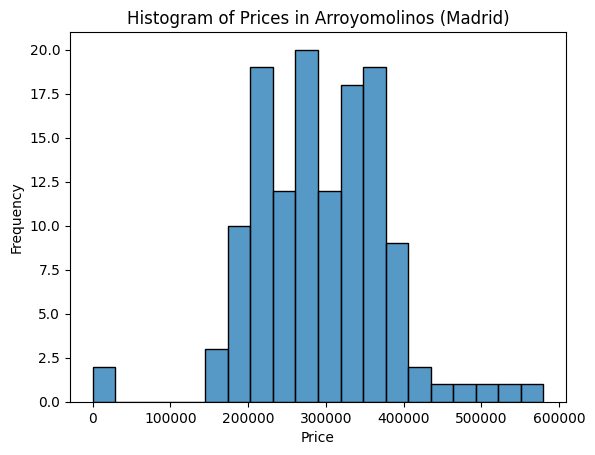

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data = arroyomolinos_data, x = "price", bins = 20).set(xlabel ="Price", ylabel = "Frequency", title =None)
plt.title('Histogram of Prices in Arroyomolinos (Madrid)')
plt.tight_layout
plt.show()

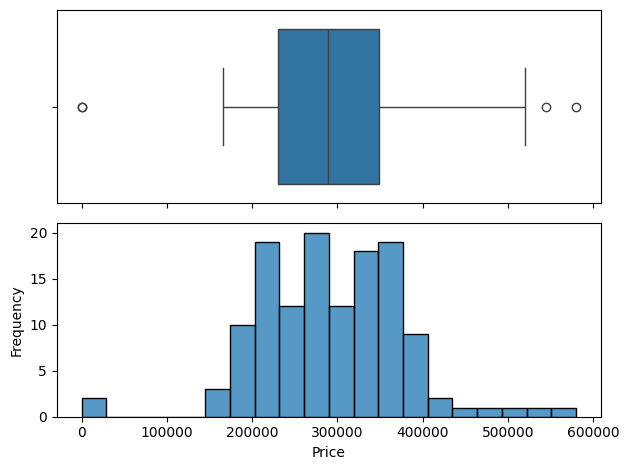

In [142]:
f,(box,hist) = plt.subplots(2, sharex=True)
sns.histplot(data = arroyomolinos_data, x = "price", bins = 20, ax = hist).set(xlabel ="Price", ylabel = "Frequency", title =None)
sns.boxplot(data = arroyomolinos_data, x = "price", ax = box)

plt.tight_layout()
plt.show()

La distribución de precios para de la población (level5 column) de "Arroyomolinos (Madrid)" muestra una distribución normal, mostrando que el rango de precios para la mayoría de las casas se encuentra entre los 200000 USD y los 400000 USD.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [156]:
valdemorillo_data = data[data['level5'] == 'Valdemorillo']
mean_price_v = valdemorillo_data['price'].mean()
print(f'El precio promedio en Valdemorillo es ${round(mean_price_v, 2)} USD')

El precio promedio en Valdemorillo es $357835.13 USD


In [157]:
galapagar_data = data[data['level5'] == 'Galapagar']
mean_price_g = galapagar_data['price'].mean()
print(f'El precio promedio en Valdemorillo es ${round(mean_price_g, 2)} USD')

El precio promedio en Valdemorillo es $352781.59 USD


La media de precios de "Valdemorillo" y "Galapagar" es muy similar.

#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [149]:
data['pps'] = data['price']/data['surface']
data.head()

,id_realEstates,isNew,realEstate_name,rooms,bathrooms,surface,price,date,description,address,...,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,pps
0,153771986,False,ferrari 57 inmobiliaria,3.0,2.0,103.0,195000,2019-12-28,Ponemos a la venta piso de 3 dormitorios con t...,"Calle Presidente Felipe Gonzalez, Arganda del Rey",...,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",1893.203883
1,153867863,False,tecnocasa fuenlabrada ferrocarril,3.0,1.0,NaN,89000,2019-12-28,"""""Agencia inmobiliaria de FUENLABRADA - zona F...","Calle Polvoranca, 6, Fuenlabrada",...,0,0,0,0,0,0,1,"40,28674","-3,79351",NaN
2,153430440,False,look find boadilla,2.0,2.0,99.0,390000,2019-12-28,"Lookandfind Boadilla, vende en exclusiva, piso...","Calle Reyes Católicos, Boadilla del Monte",...,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",3939.393939
3,152776331,False,tecnocasa fuenlabrada ferrocarril,3.0,1.0,86.0,89000,2019-12-28,Agencia inmobiliaria de FUENLABRADA - zona Fue...,"Barrio San Andres, Fuenlabrada",...,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",1034.883721
4,153180188,False,ferrari 57 inmobiliaria,2.0,2.0,106.0,172000,2019-12-28,PISOS DE OBRA NUEVA DE 2 Y 3 DORMITORIOS. OBRA...,Arganda del Rey,...,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",1622.641509


In [ ]:
mean_pps_valdemorillo = data[data['level5'] == 'Valdemorillo']['pps'].mean()
print(f'El promedio de precio por metro cuadrado (precio/m2) de "Valdemorillo" es {round(mean_pps_valdemorillo, 2)} USD')

El promedio de precio por metro cuadrado (precio/m2) de "Valdemorillo es 1306.43 USD


In [161]:
mean_pps_galapagar = data[data['level5'] == 'Galapagar']['pps'].mean()
print(f'El promedio de precio por metro cuadrado (precio/m2) de "Galapagar" es {round(mean_pps_galapagar, 2)} USD')

El promedio de precio por metro cuadrado (precio/m2) de "Galapagar" es 1570.8 USD


#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

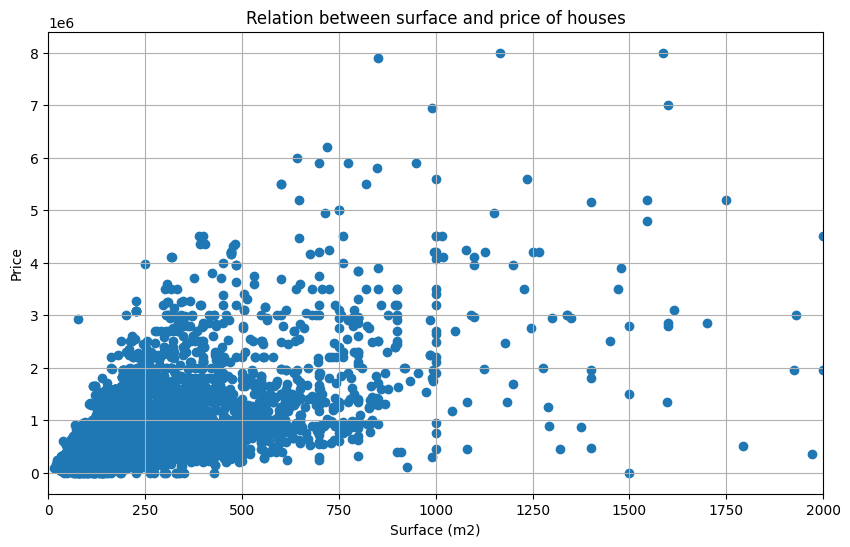

In [164]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(x = data['surface'], y = data['price'])
plt.title('Relation between surface and price of houses')
plt.xlabel('Surface (m2)')
plt.ylabel('Price')
plt.xlim(0, 2000)
plt.grid(True)
plt.tight_layout
plt.show()

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [166]:
agencies = data['realEstate_name'].nunique()
agencies

1821

#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [171]:
level5 = data['level5'].value_counts()
level5

level5
 Madrid Capital         6130
Alcalá de Henares        490
Las Rozas de Madrid      373
Móstoles                 298
Getafe                   258
                        ... 
Fresno de Torote           1
Pinilla del Valle          1
Rascafría                  1
La Hiruela                 1
Montejo de la Sierra       1
Name: count, Length: 168, dtype: int64

In [173]:
population = level5.idxmax()
number_of_houses = level5.max()
print(f'La población (columna level5) que contiene la mayor cantidad de casas es {population} con {number_of_houses} casas')


La población (columna level5) que contiene la mayor cantidad de casas es  Madrid Capital con 6130 casas


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [ ]:
# TODO

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

In [ ]:
# TODO: Code

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [ ]:
# TODO

#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [ ]:
# TODO

#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

In [ ]:
# TODO

**TODO: Markdown**. Para escribir aquí, haz doble clic en esta celda, elimina este contenido y coloca lo que quieras escribir. Luego ejecuta la celda.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [ ]:
# TODO

#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

In [ ]:
# TODO

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [ ]:
from ipyleaflet import Map, basemaps

# Mapa centrado en (60 grados latitud y -2.2 grados longitud)
# Latitud, longitud
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

In [ ]:
## Aquí: traza la coordenadas de los estados

## PON TU CÓDIGO AQUÍ:
